## Análise da série de Background Solar Wind

In [1]:
# Iniciando com a rotina criada para ler o arquivo e converter para dataframe:
%run ../rotinas/convert_extension_Dframe.py

In [2]:
# importando bibliotecas adicionais
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lombscargle packages
from astropy.timeseries import LombScargle
from gatspy.periodic import LombScargleFast

In [3]:
# lendo o arquivo desejado:
filename = 'backgroundsw5s.DAT'
df = convertDframe(filename)
df.columns = ['Time','Br','Bt','Bn','Bo']
df.head()

,Time,Br,Bt,Bn,Bo
1,18.37500,-0.27605,-0.11757,0.36490,0.47248
2,18.37506,-0.27500,-0.10812,0.36604,0.47104
3,18.37512,-0.27444,-0.11044,0.36979,0.47368
4,18.37517,-0.26908,-0.11462,0.36785,0.46985
5,18.37523,-0.27178,-0.11119,0.36600,0.46919


In [4]:
df.describe()

,Time,Br,Bt,Bn,Bo
count,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000
mean,18.750000,-0.265811,-0.147602,0.310346,0.492499
std,0.216531,0.114684,0.199317,0.033384,0.015820
min,18.375000,-0.431950,-0.487710,0.181960,0.434550
25%,18.562500,-0.363260,-0.358610,0.287760,0.482060
50%,18.750000,-0.309210,-0.157200,0.310840,0.494240
75%,18.937500,-0.161420,0.056000,0.333930,0.504100
max,19.125000,0.038400,0.194780,0.424610,0.535100


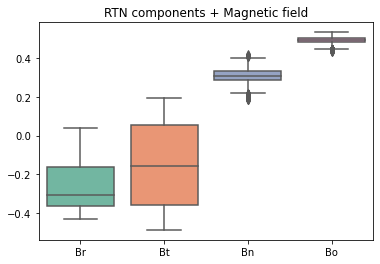

In [5]:
fig1, ax1 = plt.subplots()
ax1.set_title('RTN components + Magnetic field')
df.drop(['Time'], axis = 1, inplace = True)
ax1 = sns.boxplot(data=df, orient = 'v', palette = 'Set2')

<AxesSubplot:>

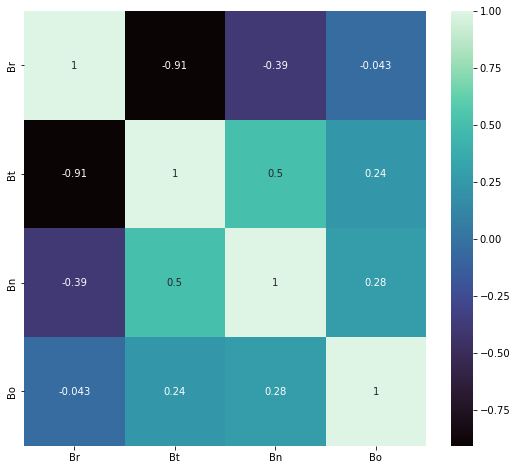

In [6]:
# HeatMap
matrix = df.corr()
f, ax = plt.subplots(figsize=(9,8))
sns.heatmap(matrix, cmap='mako', annot=True)

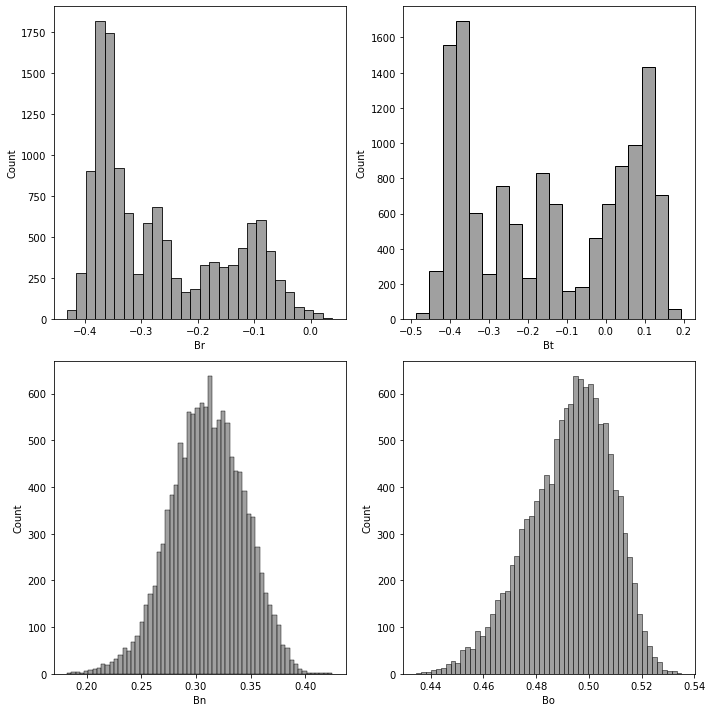

In [7]:
# Distribution
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

mag = [df['Br'], df['Bt'], df['Bn'], df['Bo']]

fig = plt.figure(figsize=(10,10))
for i in mag:
    plt.subplot(a, b, c)
    sns.histplot(i, color='grey')
    plt.tight_layout()
    c = c + 1
plt.show()

## Lomb Scargle Periodogram

In [8]:
# lendo o arquivo desejado:
filename = 'backgroundsw5s.DAT'
df = convertDframe(filename)
df.columns = ['Time','Br','Bt','Bn','Bo']
df.head()

,Time,Br,Bt,Bn,Bo
1,18.37500,-0.27605,-0.11757,0.36490,0.47248
2,18.37506,-0.27500,-0.10812,0.36604,0.47104
3,18.37512,-0.27444,-0.11044,0.36979,0.47368
4,18.37517,-0.26908,-0.11462,0.36785,0.46985
5,18.37523,-0.27178,-0.11119,0.36600,0.46919


In [9]:
t = df['Time']%1
t = t*24
t.values

array([9.     , 9.00144, 9.00288, ..., 2.99712, 2.99856, 3.     ])

In [10]:
tmin = t.values[0]
tmax = t.values[-1]
print(tmin)
print(tmax)

9.0
3.0


Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  3 to 9
 - Computing periods at 28 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [7.03665536 9.72977707 9.72977707 9.72977707 9.72977707]
Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  3 to 9
 - Computing periods at 28 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [9.72977707 9.72977707 9.72977707 9.72977707 9.72977707]
Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  3 to 9
 - Computing periods at 28 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [9.72977707 9.72977707 9.72977707 9.72977707 9.72977707]
Finding optimal frequency:
 - Estimated peak width = 0.

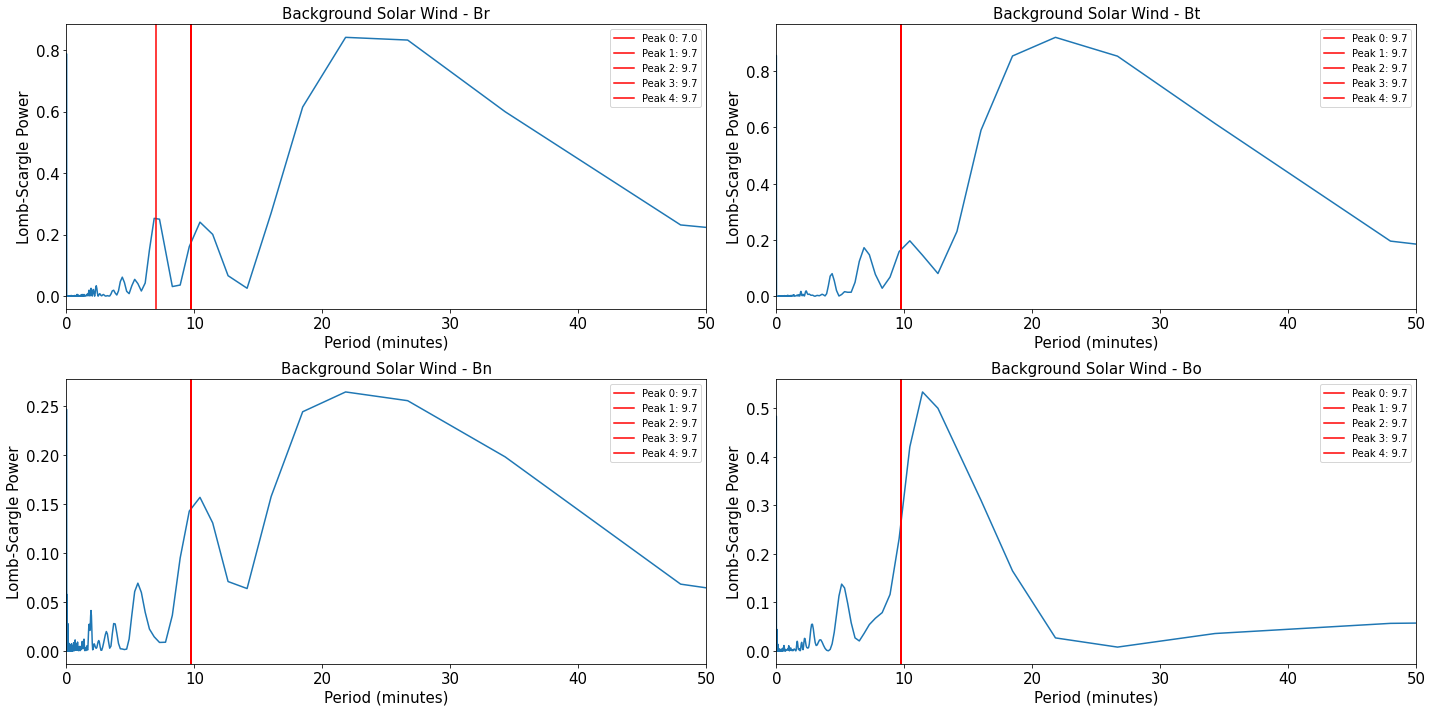

In [11]:
mag = [df['Br'], df['Bt'], df['Bn'], df['Bo']]

fig = plt.figure(figsize = (20,10))
a = 2
b = 2
c = 1
for i in mag:
    # Peaks
    model = LombScargleFast().fit(t, i)
    model.optimizer.period_range=(tmin,tmax) 
    period = model.find_best_periods()
    print('Periods = {}'.format(period))
    
    frequency, power = LombScargle(t, i, dy=None, fit_mean=False, center_data = True, 
                                   normalization = 'standard').autopower(method = 'fast')


    plt.subplot(a,b,c)
    plt.title('Background Solar Wind - ' + i.name, fontsize = 15)
    plt.xlabel('Period (minutes)', fontsize = 15)
    plt.ylabel('Lomb-Scargle Power', fontsize = 15)
    plt.xlim(0,50)
    #plt.ylim(-0.1, 0.2)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.plot(1./frequency, power)
    plt.tight_layout()
    c = c + 1
    
    # add period legend
    for i in range(len(period)):
        plt.axvline(x=period[i], color='red', label='Peak {}: {:.1f}'.format(i, period[i]))
        plt.legend(loc='upper right')

plt.show()

Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  3 to 20
 - Computing periods at 35 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [24.00028802 24.00028802 24.00028802 24.00028802 24.00028802]
Maximum power:  0.9191183367596225
Best frequency:  0.037502250135008144
Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  3 to 20
 - Computing periods at 35 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [21.5828363 21.5828363 21.5828363 21.5828363 21.5828363]
Maximum power:  0.9270785066580607
Best frequency:  0.04583608349834329
Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  3 to 20
 - Computing periods at 35 steps
Zooming-in on 10 candidate peaks:
 - C

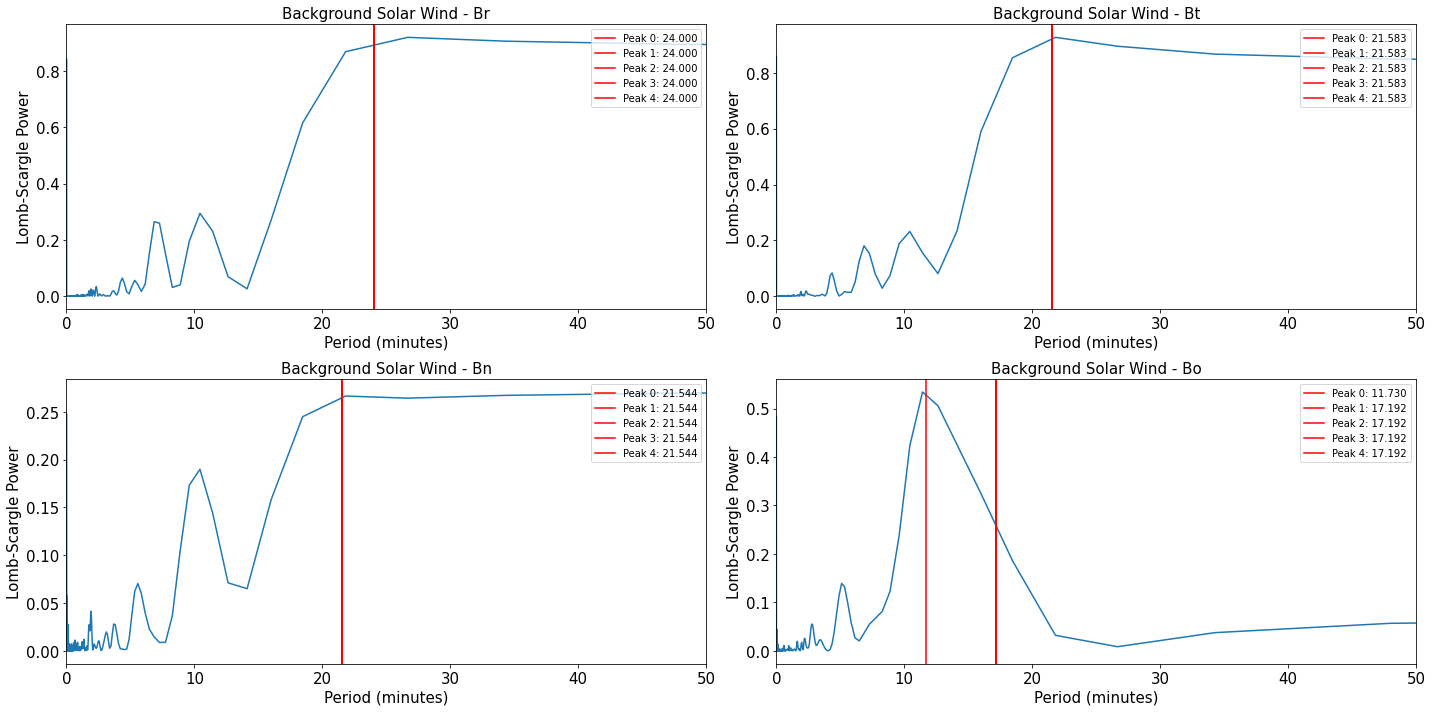

In [13]:
mag = [df['Br'], df['Bt'], df['Bn'], df['Bo']]

fig = plt.figure(figsize = (20,10))

a = 2
b = 2
c = 1
for i in mag:
    # Peaks
    model = LombScargleFast().fit(t, i)
    model.optimizer.period_range=(20,3) 
    period = model.find_best_periods()
    print('Periods = {}'.format(period))
    
    ls = LombScargle(t, i)
    frequency, power = ls.autopower()
    print('Maximum power: ', power.max())  
    best_frequency = frequency[np.argmax(power)] 
    print('Best frequency: ', best_frequency)

    plt.subplot(a,b,c)
    plt.title('Background Solar Wind - ' + i.name, fontsize = 15)
    plt.xlabel('Period (minutes)', fontsize = 15)
    plt.ylabel('Lomb-Scargle Power', fontsize = 15)
    plt.xlim(0,50)
    #plt.ylim(-0.1, 0.2)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.plot(1./frequency, power)
    plt.tight_layout()
    c = c + 1
    
    # add period legend
    for i in range(len(period)):
        plt.axvline(x=period[i], color='red', label='Peak {}: {:.3f}'.format(i, period[i]))
        plt.legend(loc='upper right')

plt.show()